In [1]:

from sklearn.feature_extraction.text import CountVectorizer
from gower.gower.gower_dist import *
from seaborn import scatterplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv(r"C:\Users\Najla\Downloads\riyadh_cafes.csv")

data

Cloning into '/kaggle/working/gower'...
remote: Enumerating objects: 699, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 699 (delta 103), reused 138 (delta 66), pack-reused 515
Receiving objects: 100% (699/699), 17.62 MiB | 25.16 MiB/s, done.
Resolving deltas: 100% (343/343), done.


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,index,coffeeName,rating,rating_count,24_hours,lon,lan
0,0,Cacti Cafe,4.2,2212,True,46.7356133,24.8339855
1,1,فازا قهوة مختصة,4.3,889,False,46.6973369,24.7724577
2,2,ناريز,3.8,39,False,46.8521092,24.8072766
3,3,Fc Lounge - اف سي لاونج,3.5,539,True,46.7680585,24.8131149
4,4,PEAKS,4.6,25,False,46.6348092,24.742045
...,...,...,...,...,...,...,...
2604,2604,Double one,4.1,319,False,46.7279354,24.8274338
2605,2605,Saws speciality coffee | ساوس للقهوة المختصة,4.5,214,False,46.6524094,24.7223206
2606,2606,عنوان القهوة,3.9,121,False,46.7647296,24.7496334
2607,2607,مقهى سوداني maqaa sudaniun,4.8,19,False,46.6666399,24.7522761


In [2]:
for col in data.columns[-5:]:
    data.loc[data[col] == "Null", col] = np.nan
    data[col] = data[col].astype(float)
    data[col].fillna(data[col].mean(), inplace=True)
    
vectorizer = CountVectorizer(min_df=2)
array = vectorizer.fit_transform(data.coffeeName).toarray()
columns = ["'" + x + "'" for x in vectorizer.get_feature_names_out()]
data = pd.concat([data, pd.DataFrame(array, columns=columns)], axis=1)
data.set_index(["coffeeName", "index"], inplace=True)

data

,,rating,rating_count,24_hours,lon,lan,'20','24cafe','45','4twins','8oz',...,'وقت','وقهوة','وقهوه','وكرك','وكف','ولاونج','ومقهى','ون','ووافل','يو'
coffeeName,index,,,,,,,,,,,,,,,,,,,,,
Cacti Cafe,0,4.2,2212.0,1.0,46.735613,24.833986,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
فازا قهوة مختصة,1,4.3,889.0,0.0,46.697337,24.772458,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ناريز,2,3.8,39.0,0.0,46.852109,24.807277,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fc Lounge - اف سي لاونج,3,3.5,539.0,1.0,46.768059,24.813115,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PEAKS,4,4.6,25.0,0.0,46.634809,24.742045,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Double one,2604,4.1,319.0,0.0,46.727935,24.827434,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Saws speciality coffee | ساوس للقهوة المختصة,2605,4.5,214.0,0.0,46.652409,24.722321,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
عنوان القهوة,2606,3.9,121.0,0.0,46.764730,24.749633,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


  0%|          | 0/660 [00:00<?, ?it/s]

[] [ 6.66279313  1.          3.44912613 10.34268679  1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.41421356  1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.      

  0%|          | 0/2609 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

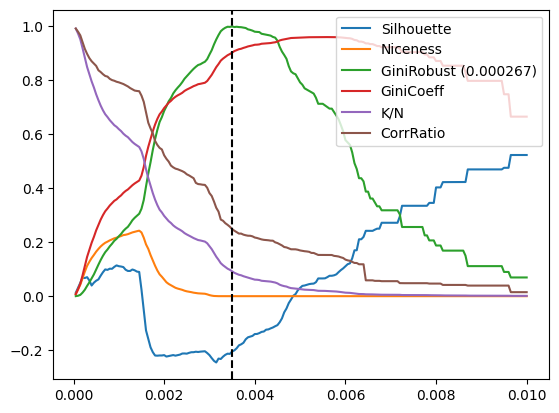

{'Silhouette': -0.20510105542897097, 'Niceness': 1.5951020303486378e-08, 'GiniRobust': 0.0002671783273585235, 'GiniCoeff': 0.903027980068992, 'K/N': 0.09237255653507091, 'sample': {'eps': 0.0035000000000000005, 'min_samples': 1}, 'counts_dict': {1: 219, 2: 16, 3: 2, 4: 1, 5: 1, 12: 1, 2331: 1}, 'CorrRatio': 0.24859686111502335}


In [3]:
cluster = optimize_dbscan(data.drop("rating", axis=1), data.rating, precomputed=True,
                          n_iter=200, factor=0.01, chunksize=20).cluster

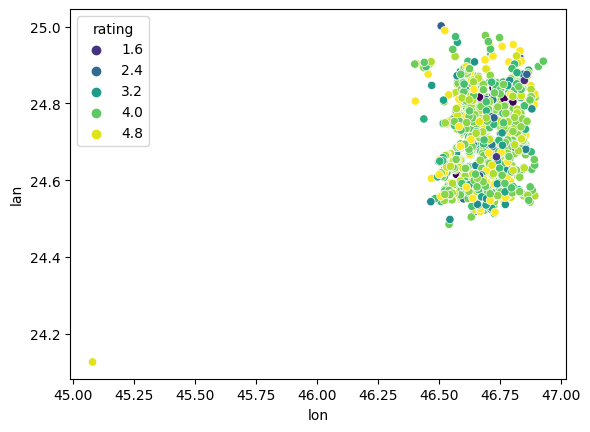

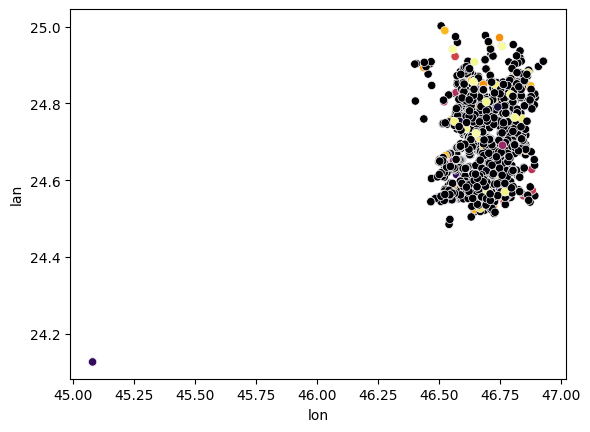

In [4]:
scatterplot(x=data.lon, y=data.lan, hue=data.rating, palette="viridis")
plt.show()
scatterplot(x=data.lon, y=data.lan, hue=cluster, palette="inferno", legend=False)
plt.show()


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("rating", axis=1), data.rating, random_state=0)

reg = RandomForestRegressor(random_state=0)

reg.fit(X_train, y_train)

reg.score(X_test, y_test)

-0.14993863537955754